# NYC Property Sales Analysis
This notebook analyzes NYC Property Sales data. It includes data cleaning, visualization, and exploration of the relationships between `SALE PRICE` and other features.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

## Load and Clean Data

In [2]:
# Define correct column names
column_names = [
    "BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", 
    "TAX CLASS AT PRESENT", "BLOCK", "LOT", "EASE-MENT", 
    "BUILDING CLASS AT PRESENT", "ADDRESS", "APARTMENT NUMBER", 
    "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", 
    "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET", 
    "YEAR BUILT", "TAX CLASS AT TIME OF SALE", 
    "BUILDING CLASS AT TIME OF SALE", "SALE PRICE", "SALE DATE"
]

# Step 1: Read CSV file with defined column names
file_path = os.path.join(os.getcwd(), "data", "nyc-rolling-sales.csv")
data = pd.read_csv(
    file_path,
    sep=",",
    quotechar='"',
    names=column_names,
    skiprows=1,
    na_values=[" - "],
    on_bad_lines="skip",
    encoding="utf-8"
)

# Step 2: Convert numeric columns to appropriate data types
numeric_columns = [
    "SALE PRICE", "LAND SQUARE FEET", "GROSS SQUARE FEET", 
    "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS"
]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Step 3: Drop rows with invalid or missing `SALE PRICE`
data = data[data["SALE PRICE"] > 0]

# Step 4: Parse and standardize `SALE DATE`
data["SALE DATE"] = pd.to_datetime(data["SALE DATE"], errors="coerce")

# Step 5: Drop rows with invalid dates
data = data.dropna(subset=["SALE DATE"])

# Step 6: Reset the index
data = data.reset_index(drop=True)

# Step 7: Display summary of the cleaned dataset
data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59758 entries, 0 to 59757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         59758 non-null  float64       
 1   NEIGHBORHOOD                    59758 non-null  object        
 2   BUILDING CLASS CATEGORY         59758 non-null  object        
 3   TAX CLASS AT PRESENT            59758 non-null  object        
 4   BLOCK                           59758 non-null  float64       
 5   LOT                             59758 non-null  float64       
 6   EASE-MENT                       59758 non-null  object        
 7   BUILDING CLASS AT PRESENT       59758 non-null  object        
 8   ADDRESS                         59758 non-null  object        
 9   APARTMENT NUMBER                59758 non-null  object        
 10  ZIP CODE                        59758 non-null  float64       
 11  RE

/tmp/ipykernel_11107/2681098558.py:37: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["SALE DATE"] = pd.to_datetime(data["SALE DATE"], errors="coerce")


(None,
             BOROUGH         BLOCK           LOT      ZIP CODE  \
 count  59758.000000  59758.000000  59758.000000  59758.000000   
 mean       2.939908   4151.680980    390.772599  10705.750929   
 min        1.000000      1.000000      1.000000      0.000000   
 25%        2.000000   1277.000000     21.000000  10301.000000   
 50%        3.000000   3167.000000     50.000000  11207.000000   
 75%        4.000000   6107.000000   1002.000000  11356.000000   
 max        5.000000  16319.000000   9106.000000  11694.000000   
 std        1.326819   3568.940017    670.849181   1264.105537   
 
        RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  \
 count       59758.000000      59758.000000  59758.000000      3.857000e+04   
 mean            1.727836          0.163175      1.903293      3.776252e+03   
 min             0.000000          0.000000      0.000000      0.000000e+00   
 25%             0.000000          0.000000      0.000000      1.426250e+03   
 5

## Visualizations

/tmp/ipykernel_11107/23880887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SALE PRICE RANGE', data=data, palette='Blues_r')


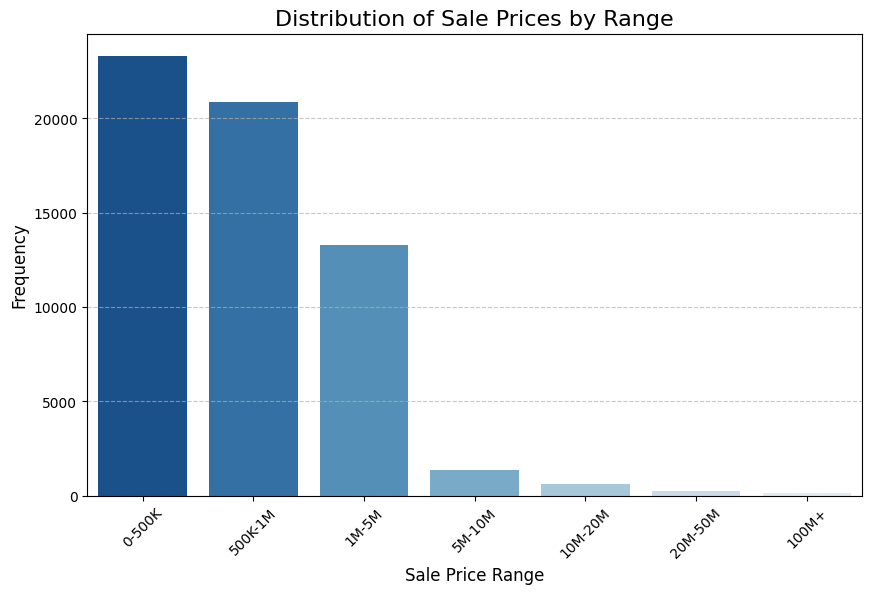

In [3]:
# 1. Distribution of SALE PRICE


bins = [0, 500000, 1000000, 5000000, 10000000, 20000000, 50000000, 1000000000]  # Custom price ranges
labels = ['0-500K', '500K-1M', '1M-5M', '5M-10M', '10M-20M', '20M-50M', '100M+']

# Create a new column for binned sale prices
data['SALE PRICE RANGE'] = pd.cut(data['SALE PRICE'], bins=bins, labels=labels, include_lowest=True)

# Plot the count of properties in each range
plt.figure(figsize=(10, 6))
sns.countplot(x='SALE PRICE RANGE', data=data, palette='Blues_r')
plt.title("Distribution of Sale Prices by Range", fontsize=16)
plt.xlabel("Sale Price Range", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

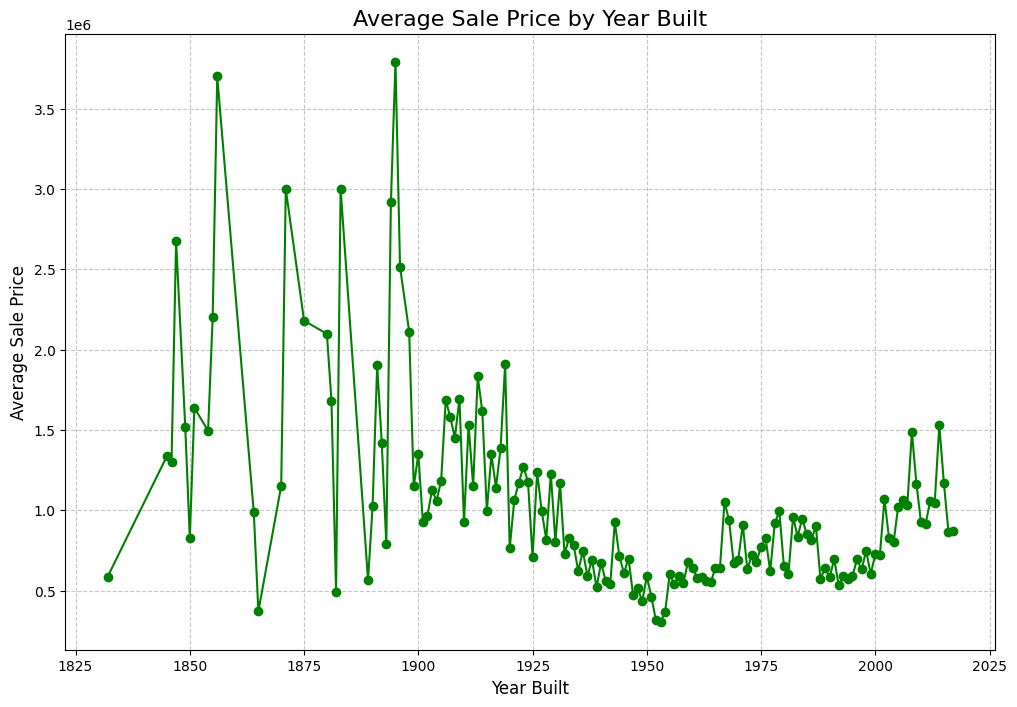

In [4]:
filtered_data = data[
    (data["SALE PRICE"] <= 5_000_000) & 
    (data["SALE PRICE"] > 0) & 
    (data["YEAR BUILT"] > 1800)
]
# Calculate the average sale price by year built
average_price_by_year = filtered_data.groupby("YEAR BUILT")["SALE PRICE"].mean()

# Line plot for Average Sale Price by Year Built
plt.figure(figsize=(12, 8))
plt.plot(
    average_price_by_year.index, 
    average_price_by_year.values, 
    marker="o", 
    color="green"
)
plt.title("Average Sale Price by Year Built", fontsize=16)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


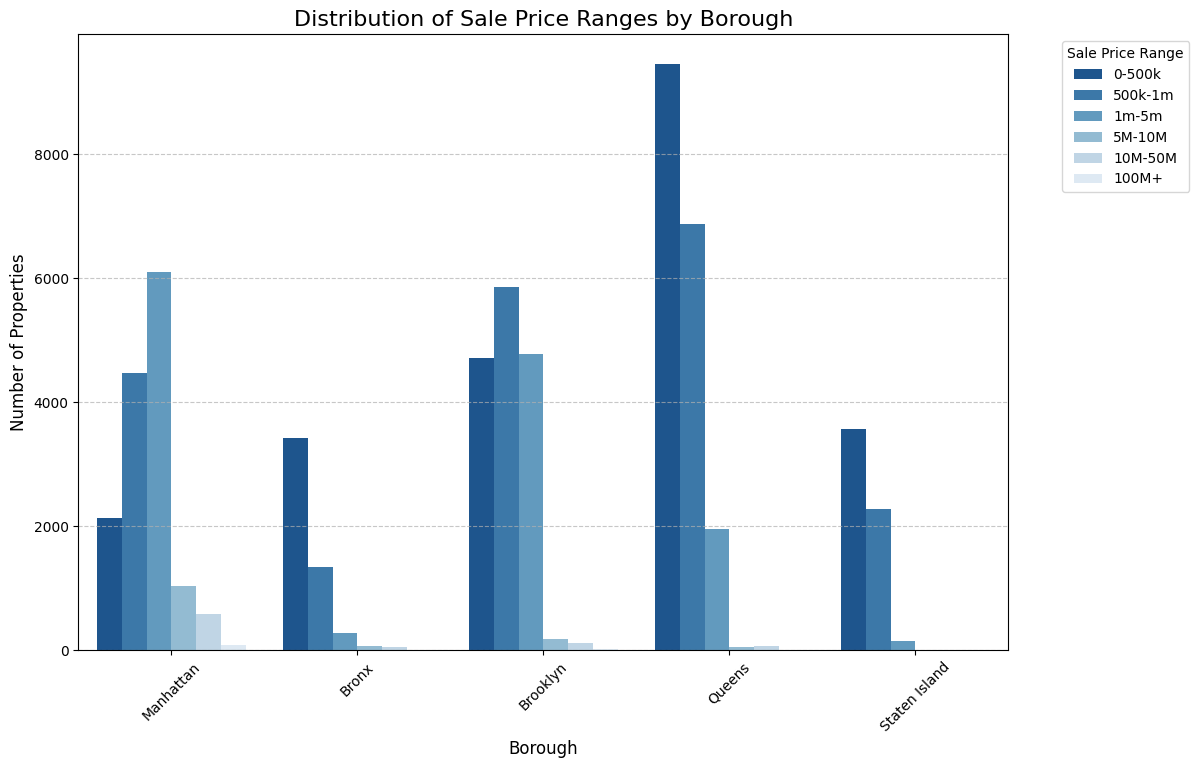

In [5]:
# Create bins for sale price ranges
bins = [0, 500000, 1000000, 5000000, 10000000, 50000000, float("inf")]
labels = ['0-500k', '500k-1m', '1m-5m', '5M-10M', '10M-50M', '100M+']

# Assign each sale price to a bin
data['SALE PRICE RANGE'] = pd.cut(data['SALE PRICE'], bins=bins, labels=labels, include_lowest=True)

# Replace numbers in the BOROUGH column with borough names
borough_mapping = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}
data["BOROUGH"] = data["BOROUGH"].map(borough_mapping)

# Plot: Count of properties by price range for each borough
plt.figure(figsize=(12, 8))
sns.countplot(x='BOROUGH', hue='SALE PRICE RANGE', data=data, palette='Blues_r')
plt.title("Distribution of Sale Price Ranges by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sale Price Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


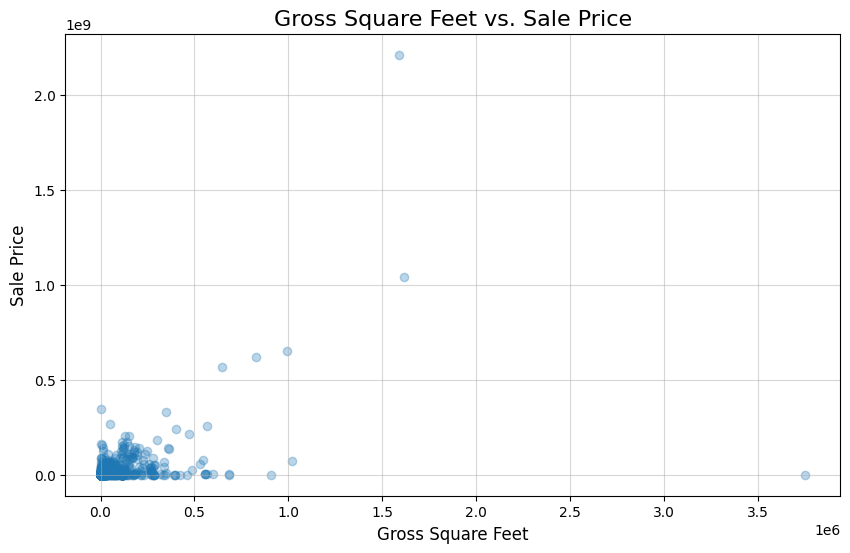

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GROSS SQUARE FEET'], data['SALE PRICE'], alpha=0.3)
plt.title('Gross Square Feet vs. Sale Price', fontsize=16)
plt.xlabel('Gross Square Feet', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

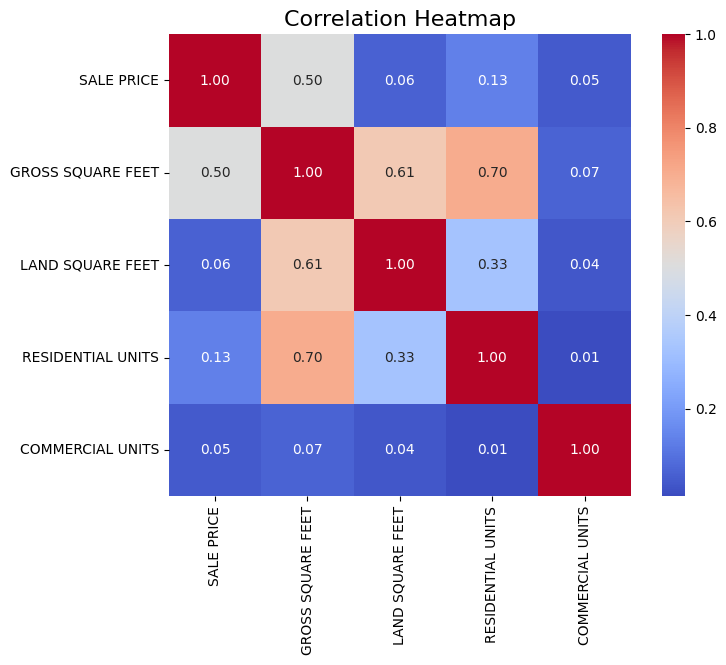

In [7]:
# 5. Correlation Heatmap
correlation_matrix = data[["SALE PRICE", "GROSS SQUARE FEET", "LAND SQUARE FEET", "RESIDENTIAL UNITS", "COMMERCIAL UNITS"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Part3: Basic Pipeline Model

MAE: 248939.99
RMSE: 348446.87
R²: 0.38


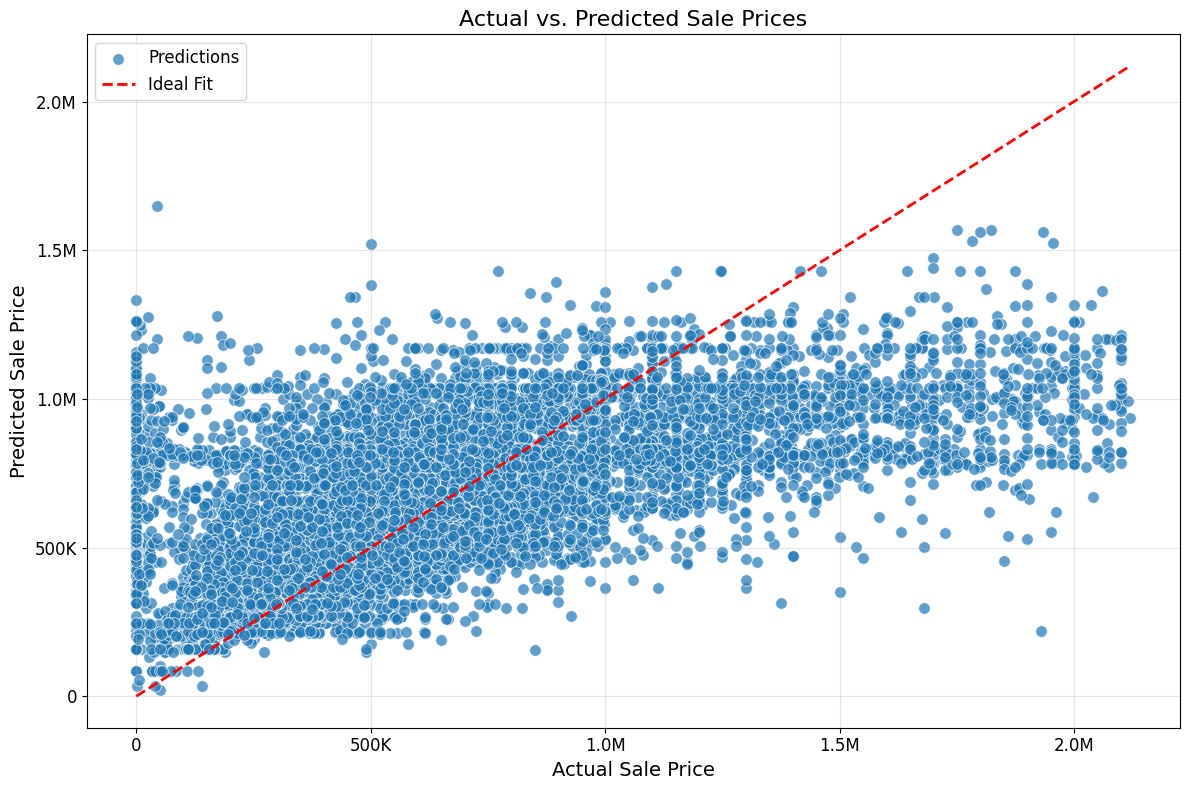

In [8]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 2. Preprocessing
# Fill missing values for numeric columns
numeric_columns = data.select_dtypes(include=["number"]).columns
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].median())

# Label encode the BOROUGH column
label_encoder = LabelEncoder()  # Initialize the LabelEncoder
data["BOROUGH"] = label_encoder.fit_transform(data["BOROUGH"])  # Apply Label Encoding

# Define features and target variable
features = [
    "BOROUGH", "LAND SQUARE FEET", "TOTAL UNITS", "YEAR BUILT", "GROSS SQUARE FEET"
]
X = data[features]  # Select features
y = data["SALE PRICE"]  # Target variable
# 3. Remove Outliers Using IQR

Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_filter = (y >= lower_bound) & (y <= upper_bound)
X = X[outlier_filter]
y = y[outlier_filter]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 6. Actual vs Predicted Sale Prices
# Function to format axis labels as K (thousands) or M (millions)
def format_ticks(value, _):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'
    elif value >= 10_000:
        return f'{value/1_000:.0f}K'
    else:
        return f'{value:.0f}'

# Plot Actual vs. Predicted Sale Prices
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, s=70, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label="Ideal Fit")

# Add labels and titles
plt.title("Actual vs. Predicted Sale Prices", fontsize=16)
plt.xlabel("Actual Sale Price", fontsize=14)
plt.ylabel("Predicted Sale Price", fontsize=14)

# Format axes with custom tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Improve layout and add grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Worst Predictions
          Actual     Predicted  Absolute Error         Error
28150  1930000.0  2.193614e+05    1.710639e+06  1.710639e+06
16009    43000.0  1.648091e+06    1.605091e+06 -1.605091e+06
23754  1950000.0  5.512472e+05    1.398753e+06  1.398753e+06
16990  1850000.0  4.549596e+05    1.395040e+06  1.395040e+06
47459  1680000.0  2.957053e+05    1.384295e+06  1.384295e+06
32202  1900000.0  5.276465e+05    1.372354e+06  1.372354e+06
15713  2040000.0  6.702601e+05    1.369740e+06  1.369740e+06
47057  1962500.0  6.201084e+05    1.342392e+06  1.342392e+06
31505       10.0  1.333775e+06    1.333765e+06 -1.333765e+06
32203  1860000.0  5.372709e+05    1.322729e+06  1.322729e+06

Best Predictions
         Actual     Predicted  Absolute Error      Error
20259  365000.0  365021.59375        21.59375  -21.59375
44470  700000.0  700043.50000        43.50000  -43.50000
43246  298000.0  298064.62500        64.62500  -64.62500
57332  310000.0  310092.15625        92.15625  -92.15625
40801  6

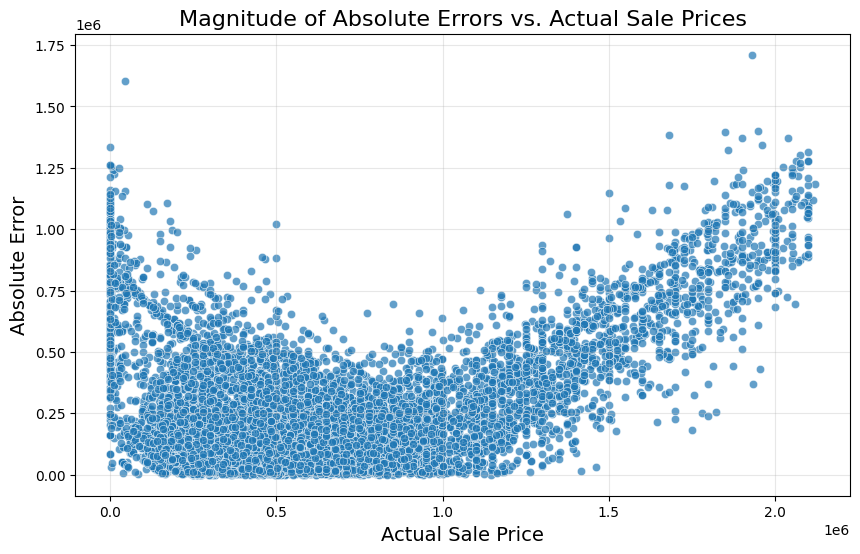

In [9]:
# Create a DataFrame of errors
errors = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Absolute Error": np.abs(y_test - y_pred),
    "Error": y_test - y_pred  # Positive: Overestimation, Negative: Underestimation
})

# Worst Predictions (Top 10 highest absolute errors)
worst_predictions = errors.sort_values(by="Absolute Error", ascending=False).head(10)
print("Worst Predictions")
print(worst_predictions)

# Best Predictions (Top 10 lowest absolute errors)
best_predictions = errors.sort_values(by="Absolute Error", ascending=True).head(10)
print("\nBest Predictions")
print(best_predictions)

# Scatterplot of Actual vs Absolute Error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=errors["Actual"], y=errors["Absolute Error"], alpha=0.7)
plt.title("Magnitude of Absolute Errors vs. Actual Sale Prices", fontsize=16)
plt.xlabel("Actual Sale Price", fontsize=14)
plt.ylabel("Absolute Error", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

Top 5 Overestimations:
        Actual    Predicted     Residual
16009  43000.0  1648090.625 -1605090.625
31505     10.0  1333775.125 -1333765.125
50151     10.0  1262579.500 -1262569.500
7464      10.0  1261342.875 -1261332.875
27593   1000.0  1258562.875 -1257562.875
Top 5 Underestimations:
          Actual     Predicted      Residual
32202  1900000.0  527646.50000  1.372354e+06
47459  1680000.0  295705.34375  1.384295e+06
16990  1850000.0  454959.56250  1.395040e+06
23754  1950000.0  551247.25000  1.398753e+06
28150  1930000.0  219361.37500  1.710639e+06


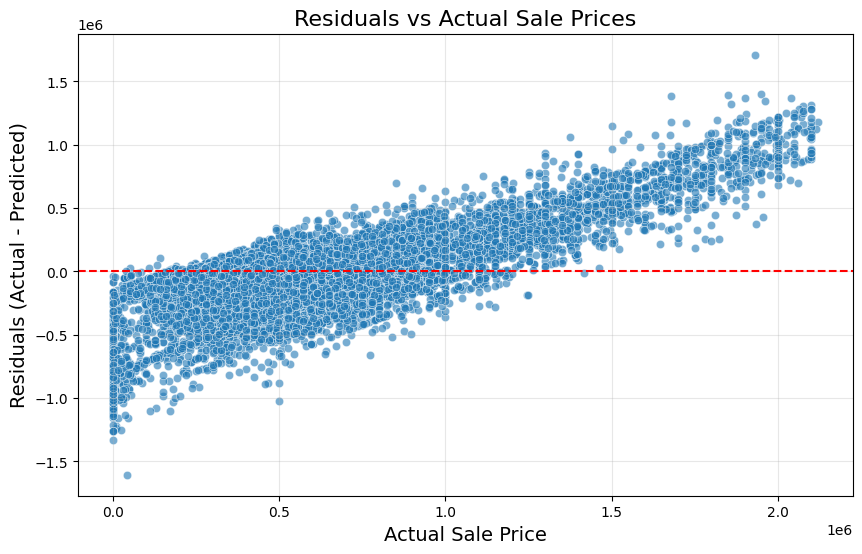

In [10]:
# Residuals
residuals = y_test - y_pred

# Worst and Best Performing Predictions
worst_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
worst_predictions = worst_predictions.sort_values(by='Residual', ascending=True)  # Largest negative residuals (worst)

# Top 5 Overestimations
print("Top 5 Overestimations:")
print(worst_predictions.head())

# Top 5 Underestimations
print("Top 5 Underestimations:")
print(worst_predictions.tail())


# Scatter plot of residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual Sale Prices", fontsize=16)
plt.xlabel("Actual Sale Price", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


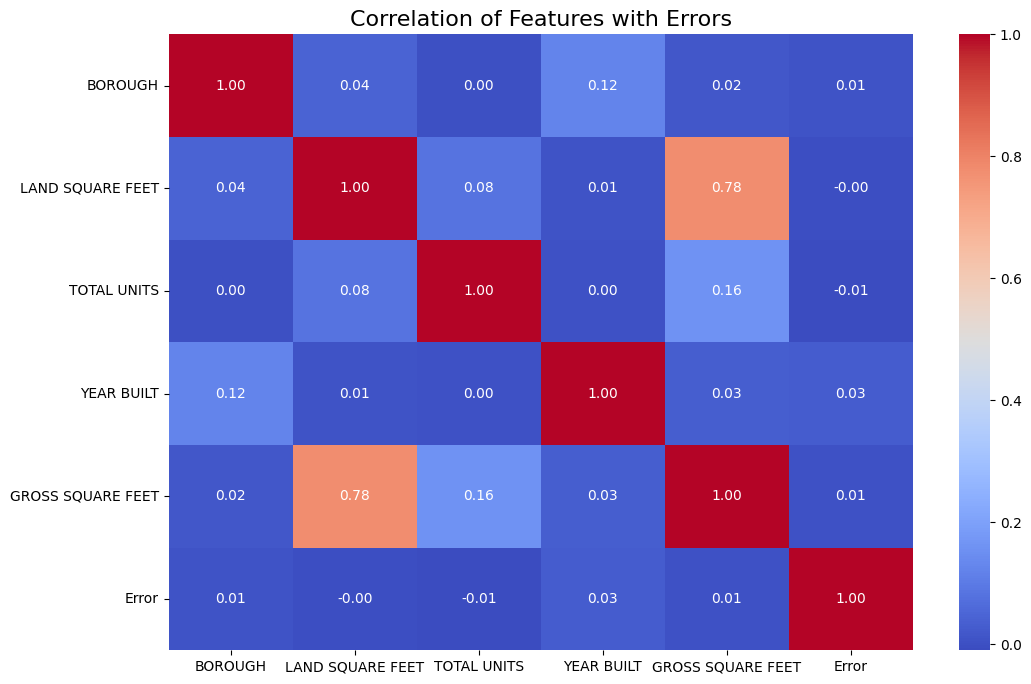

In [11]:
# Combine errors with test features
test_data = X_test.copy()
test_data["Error"] = residuals

# Heatmap to explore correlation between errors and features
plt.figure(figsize=(12, 8))
sns.heatmap(test_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with Errors", fontsize=16)
plt.show()



/tmp/ipykernel_11107/3865960512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


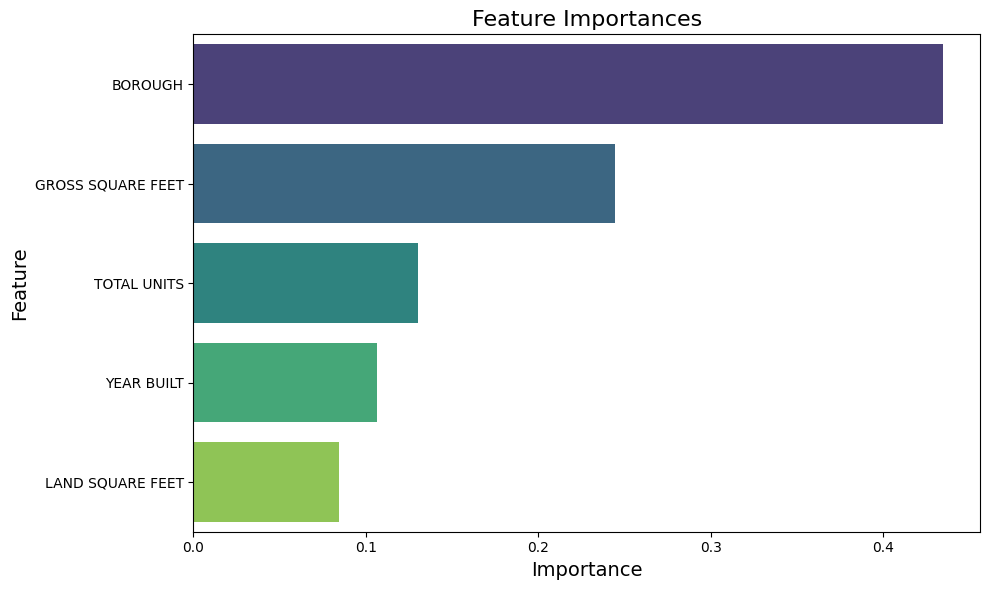

In [12]:
# Get feature importances
importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


Mean Residual: -786.34


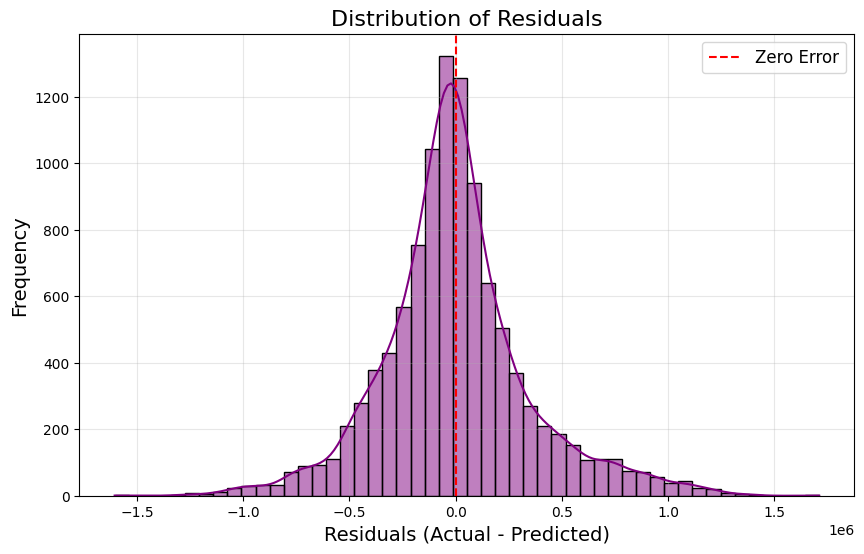

In [13]:
# Mean of residuals
mean_residual = residuals.mean()
print(f"Mean Residual: {mean_residual:.2f}")

# Visualization of residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='purple')
plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


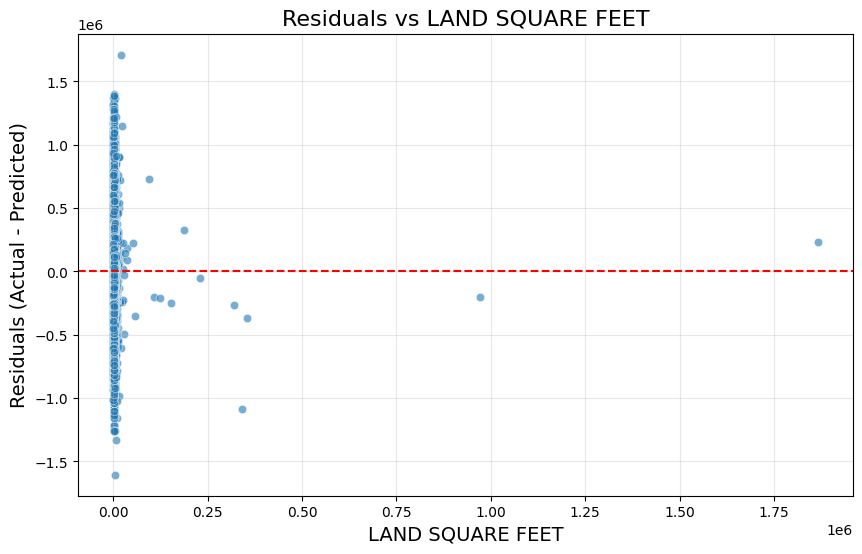

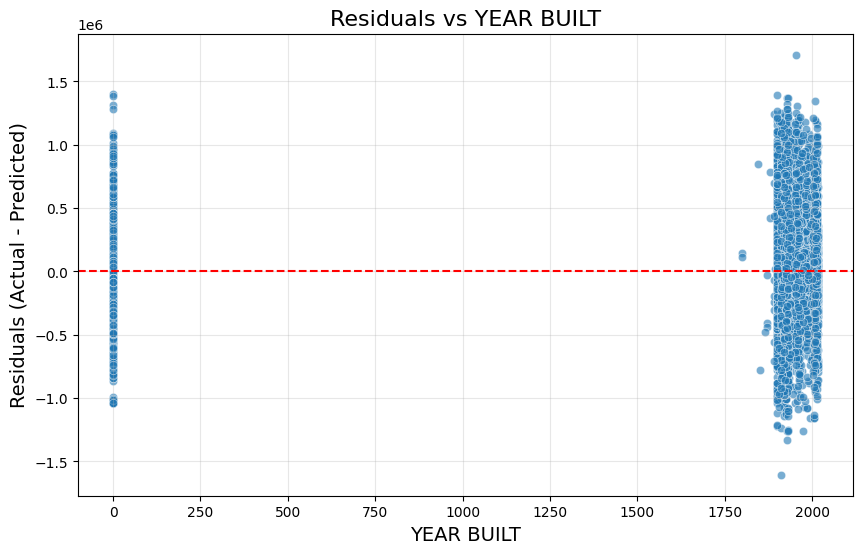

In [14]:
# Residuals vs. Key Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['LAND SQUARE FEET'], y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs LAND SQUARE FEET", fontsize=16)
plt.xlabel("LAND SQUARE FEET", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YEAR BUILT'], y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs YEAR BUILT", fontsize=16)
plt.xlabel("YEAR BUILT", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()
